<h1>Week 4 Homework: Visualization</h1>

<p>
One last assignment! This week you have only one homework question to turn in, but you are encouraged to
work on a project and apply what you've learned to it.</p>

<h1> Question 1 </h1>

<p> Load the MovieData.csv file (one last time...) and:
</p>

<h3>
a. Create a scatter-plot with Movie Budgets as the X axis, and Profitability (Total Revenue / Budget) as
the Y axis. Resize the Y axis as needed to convey the most information.
</h3>

In [1]:
# define a function to parse the date string in the data file
import datetime as dt
def make_date(date_str):
    '''
    Turn a MM/DD/YY string into a datetime object
    '''
    m, d, y = date_str.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else:
        y += 2000
    return dt.datetime(y, m, d)

In [2]:
#read data file
import pandas
movies = pandas.read_csv("MovieData.csv", sep='\t', na_values=["Unknown","Unkno"],parse_dates=[0], date_parser=make_date)

In [3]:
#create new column with computed profitability
movies["Profitability"] = movies["Worldwide Gross"]/movies["Budget"]

In [4]:
#Get rid of movies where budget or worldwide gross are 0 or unkown
movies2 = movies.fillna(0) # convert unknowns to 0
movies3 = movies2[movies2.Budget > 0]
movies4 = movies3[movies3["Worldwide Gross"] > 0]

In [5]:
#setup up Matplot Lib
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
#create series of our columns of interest in preparation for plotting
MovieBudget = movies4.Budget
MovieProfit = movies4.Profitability

(0, 100)

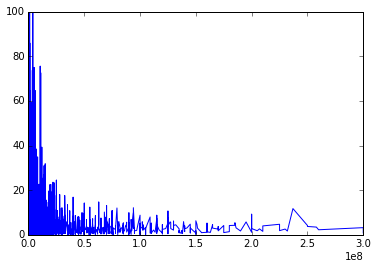

In [7]:
fig = plt.figure ()                  #Create the new figure
ax = fig.add_subplot (111)           #Create a single subplot within the figure
ax.plot (MovieBudget,MovieProfit)    #Plot the data in the subplot
ax.set_ylim(0,100)                   # Ignore films with with vary small budgets that generate ridiculous mutliples when compared to rev

<h3> b. Create two time series: one a count of movies released by month, the other those movies' average
profitability. Plot both series either in two aligned subplots or in a single subplot with a secondary
axis. </h3>


In [8]:
# I'll start with my dataframe that has filtered out records that don't have both non-zer budget and world wide gross because the
# definition of profitability without these two values is problematic.

# step 1 is to create an aggregator month column for our dataset
# this is our custom function which parses out the month from a date value
def get_month(date):
    return date.month
movies4["Month"] = movies4.Release_Date.apply(get_month)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
# Get the aggregator 
by_month = movies4.groupby('Month')

In [10]:
# Get the average monthly profitability
monthly_mean = by_month.mean()
monthly_movie_profit_means = monthly_mean.Profitability

# Get the count of movies 
# specifing a single column to count
monthly_movie_counts = by_month.Movie.aggregate(len)

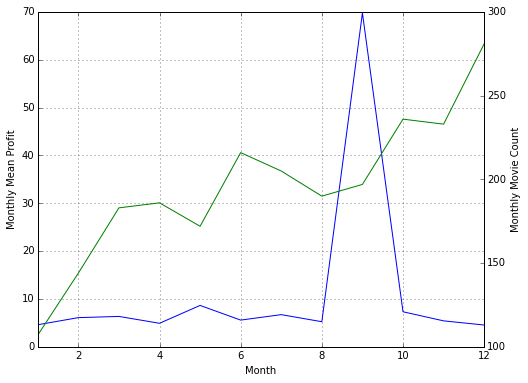

In [11]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.set_ylabel("Monthly Mean Profit")
monthly_movie_profit_means.plot(ax=ax)
ax2=monthly_movie_counts.plot(ax=ax,secondary_y=True) #Create the secondaryyaxis
ax2.set_ylabel("Monthly Movie Count")